## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (2)

##### Werkzeuge und Daten importieren

In [1]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import math
from scipy import stats
from sklearn import tree
import seaborn as sns
sns.set(style="whitegrid") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [3]:
Daten.shape

(401, 377)

In [4]:
#Daten.head(3)

In [96]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

##### Untergruppen und Listen für die Analyse

In [5]:
Daten_A3 = Daten[Daten['A-Q3_27'] >= 1]

In [6]:
Daten_A3.shape

(396, 377)

In [7]:
Finished = Daten[Daten['C-Q1_7'] >= 1]

In [8]:
Finished.shape

(391, 377)

Liste erstellen:

In [9]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [10]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [11]:
Liste_C_Q1 = [col for col in Finished.columns if 'C-Q1' in col]

In [12]:
#Liste_D = ['D-Q1','D-Q2','D-Q2a','D-Q2b','D-Q3','D-Q4','D-Q5','D-Q6']

##### Vorbereitung der Daten für die Analyse

Studienrichtung:

In [13]:
Daten['D-Q2a_neu'] = 0

In [14]:
j=0
for i in Daten[Daten['D-Q2a']!=0]['D-Q2a']:
    if i == 1:
        Daten.loc[j,'D-Q2a_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q2a_neu'] = 2
    elif i == 3 or i == 4:
        Daten.loc[j,'D-Q2a_neu'] = 3
    else:
        Daten.loc[j,'D-Q2a_neu'] = 4
    j = j+1

Studienjahr (+ Studium):

In [15]:
Daten['D-Q2b_neu'] = 0

j=0
for i in Daten[Daten['D-Q2b']!=0]['D-Q2b']:
    if i == 1:
        Daten.loc[j,'D-Q2b_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q2b_neu'] = 2
    elif i == 3:
        Daten.loc[j,'D-Q2b_neu'] = 3
    elif i == 4:
        Daten.loc[j,'D-Q2b_neu'] = 4
    j = j+1

In [16]:
j=0
for i in Daten['D-Q2']:
    if i == 2:
        Daten.loc[j,'D-Q2b_neu'] = 5
    elif i == 3:
        Daten.loc[j,'D-Q2b_neu'] = 5
    j = j+1

In [17]:
Daten['D-Q2b_neu'].value_counts()

1    173
2     87
3     50
0     46
4     27
5     18
Name: D-Q2b_neu, dtype: int64

Niveau:

In [18]:
Daten['D-Q4_neu'] = 0

j=0
for i in Daten[Daten['D-Q4']!=0]['D-Q4']:
    if i == 1:
        Daten.loc[j,'D-Q4_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q4_neu'] = 2
    elif i == 3:
        Daten.loc[j,'D-Q4_neu'] = 3
    elif i == 4:
        Daten.loc[j,'D-Q4_neu'] = 4
    else:
        Daten.loc[j,'D-Q4_neu'] = 5
    j = j+1

In [19]:
Daten['D-Q4_neu'].value_counts()

1    151
3    103
2     66
5     35
4     34
0     12
Name: D-Q4_neu, dtype: int64

Alter:

In [20]:
Daten['D-Q5_neu'] = 0

j=0
for i in Daten[Daten['D-Q5']!=0]['D-Q5']:
    if i <= 18:
        Daten.loc[j,'D-Q5_neu'] = 1
    elif i == 19:
        Daten.loc[j,'D-Q5_neu'] = 2
    elif i == 20 or i == 4:
        Daten.loc[j,'D-Q5_neu'] = 3
    else:
        Daten.loc[j,'D-Q5_neu'] = 4
    j = j+1

In [21]:
Daten['D-Q5_neu'].value_counts()

4    125
1    104
2     84
3     66
0     22
Name: D-Q5_neu, dtype: int64

Erstsprache Spanisch:

In [22]:
Daten['D-Q7_neu'] = 0

j=0
for i in Daten['D-Q7']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    j = j+1

j=0
for i in Daten['D-Q7c']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    j = j+1

j=0
for i in Daten['D-Q7e']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    j = j+1

363 Studierende haben Spanisch als eine ihrer Erstsprachen angegeben. Die übrigen 25 verteilen sich auf verschiedene Sprachen (13 TN haben diese Frage nicht beantwortet), darunter haben 5 Personen Katalanisch/Valencianisch und 4 Galicisch angegeben.

In [23]:
Daten['D-Q7b'].value_counts()

2    287
1    103
0     11
Name: D-Q7b, dtype: int64

103 Personen sind laut eigenen Angaben bi- oder trilingual.

Weitere Sprachkenntnisse:

In [24]:
Spr_cols = ['D-Q7','D-Q7c','D-Q7e','D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']

In [25]:
l_germ = [9,15,39,19,36]
l_rom = [13,16,17]
l_slaw = [23,24,25,26,27,28,41,18,44]
l_asiat = [6,7,8,22,31,42,45]

In [26]:
Daten['D-Q8_fr'] = 0
Daten['D-Q8_gr'] = 0
Daten['D-Q8_lat'] = 0
Daten['D-Q8_germ'] = 0
Daten['D-Q8_rom'] = 0
Daten['D-Q8_slaw'] = 0
Daten['D-Q8_asiat'] = 0

In [27]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 10:
            Daten.loc[i,'D-Q8_fr'] = 1
            pass

In [28]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 20:
            Daten.loc[i,'D-Q8_gr'] = 1
            pass

In [29]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 21:
            Daten.loc[i,'D-Q8_lat'] = 1
            pass

In [30]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_germ:
            Daten.loc[i,'D-Q8_germ'] = 1
            pass

In [31]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_rom:
            Daten.loc[i,'D-Q8_rom'] = 1
            pass

In [32]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_slaw:
            Daten.loc[i,'D-Q8_slaw'] = 1
            pass

In [33]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_asiat:
            Daten.loc[i,'D-Q8_asiat'] = 1
            pass

Strategienerwerbskontexte:

In [34]:
erwerb = {'E1': ['B-Q2-1_1','B-Q2-1_2','B-Q2-1_3','B-Q2-1_4','B-Q2-1_5','B-Q2-1_6','B-Q2-1_7'], 
         'E2': ['B-Q2-2_1','B-Q2-2_2','B-Q2-2_3','B-Q2-2_4','B-Q2-2_5','B-Q2-2_6','B-Q2-2_7'],
         'E3': ['B-Q2-3_1','B-Q2-3_2','B-Q2-3_3','B-Q2-3_4','B-Q2-3_5','B-Q2-3_6','B-Q2-3_7'],
         'E4': ['B-Q2-4_1','B-Q2-4_2','B-Q2-4_3','B-Q2-4_4','B-Q2-4_5','B-Q2-4_6','B-Q2-4_7'],
         'E5': ['B-Q2-5_1','B-Q2-5_2','B-Q2-5_3','B-Q2-5_4','B-Q2-5_5','B-Q2-5_6','B-Q2-5_7'],
         'E6': ['B-Q2-6_1','B-Q2-6_2','B-Q2-6_3','B-Q2-6_4','B-Q2-6_5','B-Q2-6_6','B-Q2-6_7'],
         'E7': ['B-Q2-7_1','B-Q2-7_2','B-Q2-7_3','B-Q2-7_4','B-Q2-7_5','B-Q2-7_6','B-Q2-7_7'],
         'E8': ['B-Q2-8_1','B-Q2-8_2','B-Q2-8_3','B-Q2-8_4','B-Q2-8_5'],
         'E9': ['B-Q2-9_1','B-Q2-9_2','B-Q2-9_3','B-Q2-9_4','B-Q2-9_5']}

* 1- En las clases de Lengua y Literatura en el colegio o instituto
* 2- En las clases de inglés en el colegio o instituto
* 3- En otras clases de idiomas en el colegio o instituto
* 4- En clases de alemán anteriores en la Universidad
* 5- En otras asignaturas de mi carrera universitaria
* 6- En clases de lenguas en escuelas de idiomas o academias
* 7- En mi curso de alemán actual
* 8- En mi familia, con mis amigos/as o compañeros/as de clase
* 9- Por mi cuenta, sin ayuda de otras personas
* 10- Otros:
* 11- No sé cómo he aprendido estas estrategias.

In [35]:
Daten['B-Q2_E1'] = 0
Daten['B-Q2_E2'] = 0
Daten['B-Q2_E3'] = 0
Daten['B-Q2_E4'] = 0
Daten['B-Q2_E5'] = 0
Daten['B-Q2_E6'] = 0
Daten['B-Q2_E7'] = 0
Daten['B-Q2_E8'] = 0
Daten['B-Q2_E9'] = 0

In [36]:
add_columns(Daten,erwerb['E1'],'B-Q2_E1')

In [37]:
add_columns(Daten,erwerb['E2'],'B-Q2_E2')

In [38]:
add_columns(Daten,erwerb['E3'],'B-Q2_E3')

In [39]:
add_columns(Daten,erwerb['E4'],'B-Q2_E4')

In [40]:
add_columns(Daten,erwerb['E5'],'B-Q2_E5')

In [41]:
add_columns(Daten,erwerb['E6'],'B-Q2_E6')

In [42]:
add_columns(Daten,erwerb['E7'],'B-Q2_E7')

In [43]:
add_columns(Daten,erwerb['E8'],'B-Q2_E8')

In [44]:
add_columns(Daten,erwerb['E9'],'B-Q2_E9')

Methoden des Strategienerwerbs:

In [45]:
erwerb1 = {'U1': ['B-Q2-1_1','B-Q2-2_1','B-Q2-3_1','B-Q2-4_1','B-Q2-5_1','B-Q2-6_1','B-Q2-7_1'], 
         'U2': ['B-Q2-1_2','B-Q2-2_2','B-Q2-3_2','B-Q2-4_2','B-Q2-5_2','B-Q2-6_2','B-Q2-7_2'],
         'U3': ['B-Q2-1_3','B-Q2-2_3','B-Q2-3_3','B-Q2-4_3','B-Q2-5_3','B-Q2-6_3','B-Q2-7_3'],
         'U4': ['B-Q2-1_4','B-Q2-2_4','B-Q2-3_4','B-Q2-4_4','B-Q2-5_4','B-Q2-6_4','B-Q2-7_4'],
         'U5': ['B-Q2-1_5','B-Q2-2_5','B-Q2-3_5','B-Q2-4_5','B-Q2-5_5','B-Q2-6_5','B-Q2-7_5'],
         'U6': ['B-Q2-1_6','B-Q2-2_6','B-Q2-3_6','B-Q2-4_6','B-Q2-5_6','B-Q2-6_6','B-Q2-7_6']}

* (1)	Las estrategias se presentaron (y explicaron) en clase.
* (2)	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* (3)	Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* (4)	Se probaron y se compararon diferentes estrategias.
* (5)	Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* (6)	Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* (7)	Otros:

In [46]:
Daten['B-Q2_U1'] = 0
Daten['B-Q2_U2'] = 0
Daten['B-Q2_U3'] = 0
Daten['B-Q2_U4'] = 0
Daten['B-Q2_U5'] = 0
Daten['B-Q2_U6'] = 0

In [47]:
add_columns(Daten,erwerb1['U1'],'B-Q2_U1')

In [48]:
add_columns(Daten,erwerb1['U2'],'B-Q2_U2')

In [49]:
add_columns(Daten,erwerb1['U3'],'B-Q2_U3')

In [50]:
add_columns(Daten,erwerb1['U4'],'B-Q2_U4')

In [51]:
add_columns(Daten,erwerb1['U5'],'B-Q2_U5')

In [52]:
add_columns(Daten,erwerb1['U6'],'B-Q2_U6')

Kombinierter Strategieneinsatz:

In [53]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         #'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         #'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* S1: Auf Wortebene - intralingual
* S2: Auf Wortebene - interlingual
* S3: Auf Satz- und Textebene - engerer Kontext
* S4: Auf Satz- und Textebene - weiterer Kontext (S4a: intratextuell, S4b: Bezug zu Fach- und Weltwissen)
* S5: Außersprachlicher Kontext
* S6: Metakognitive Strategien

In [54]:
Daten['A-Q4'] = 0

In [55]:
for i in Daten.index:
    el1 = Daten.loc[i,strat['S1']]
    media1, numer1 = el1.mean(), el1[el1>=3].count()
    el2 = Daten.loc[i,strat['S2']]
    media2, numer2 = el2.mean(), el2[el2>=3].count()
    el3 = Daten.loc[i,strat['S3']]
    media3, numer3 = el3.mean(), el3[el3>=3].count()
    el4 = Daten.loc[i,strat['S4']]
    media4, numer4 = el4.mean(), el4[el4>=3].count()
    el5 = Daten.loc[i,strat['S5']]
    media5, numer5 = el5.mean(), el5[el5>=3].count()
    el6 = Daten.loc[i,strat['S6']]
    media6, numer6 = el6.mean(), el6[el6>=3].count()
    #if media1 >= 2 and numer1 >= 2 and media2 >= 2 and numer2 >= 2 and media3 >= 2 and numer3 >= 2 and media4 >= 2 and numer4 >= 4 and media5 >= 2 and numer5 >= 2 and media6 >= 2 and numer6 >= 3:
    if numer1 >= 2 and numer2 >= 2 and numer3 >= 2 and numer4 >= 4 and numer5 >= 2 and numer6 >= 3:
        Daten.loc[i,'A-Q4'] = 1

In [56]:
Daten['A-Q4'].value_counts()

1    260
0    141
Name: A-Q4, dtype: int64

In [57]:
def get_good_str(df):
    df_good = df[((df[strat['S1']] >= 3).sum(axis=1) >= 2) & ((df[strat['S2']] >= 3).sum(axis=1) >= 2) & ((df[strat['S3']] >= 3).sum(axis=1) >= 2) & ((df[strat['S4']] >= 3).sum(axis=1) >= 4) & ((df[strat['S5']] >= 3).sum(axis=1) >= 2) & ((df[strat['S6']] >= 3).sum(axis=1) >= 3)]
    return df_good.shape[0], (df_good.shape[0])/(df.shape[0])*100

In [58]:
Stud_U1 = Finished[(Finished['B-Q2-1_1'] == 1) | (Finished['B-Q2-2_1'] == 1) | (Finished['B-Q2-3_1'] == 1) | (Finished['B-Q2-4_1'] == 1) | (Finished['B-Q2-5_1'] == 1) | (Finished['B-Q2-6_1'] == 1) | (Finished['B-Q2-7_1'] == 1)]
Stud_U2 = Finished[(Finished['B-Q2-1_2'] == 1) | (Finished['B-Q2-2_2'] == 1) | (Finished['B-Q2-3_2'] == 1) | (Finished['B-Q2-4_2'] == 1) | (Finished['B-Q2-5_2'] == 1) | (Finished['B-Q2-6_2'] == 1) | (Finished['B-Q2-7_2'] == 1)]
Stud_U3 = Finished[(Finished['B-Q2-1_3'] == 1) | (Finished['B-Q2-2_3'] == 1) | (Finished['B-Q2-3_3'] == 1) | (Finished['B-Q2-4_3'] == 1) | (Finished['B-Q2-5_3'] == 1) | (Finished['B-Q2-6_3'] == 1) | (Finished['B-Q2-7_3'] == 1)]
Stud_U4 = Finished[(Finished['B-Q2-1_4'] == 1) | (Finished['B-Q2-2_4'] == 1) | (Finished['B-Q2-3_4'] == 1) | (Finished['B-Q2-4_4'] == 1) | (Finished['B-Q2-5_4'] == 1) | (Finished['B-Q2-6_4'] == 1) | (Finished['B-Q2-7_4'] == 1)]
Stud_U5 = Finished[(Finished['B-Q2-1_5'] == 1) | (Finished['B-Q2-2_5'] == 1) | (Finished['B-Q2-3_5'] == 1) | (Finished['B-Q2-4_5'] == 1) | (Finished['B-Q2-5_5'] == 1) | (Finished['B-Q2-6_5'] == 1) | (Finished['B-Q2-7_5'] == 1)]
Stud_U6 = Finished[(Finished['B-Q2-1_6'] == 1) | (Finished['B-Q2-2_6'] == 1) | (Finished['B-Q2-3_6'] == 1) | (Finished['B-Q2-4_6'] == 1) | (Finished['B-Q2-5_6'] == 1) | (Finished['B-Q2-6_6'] == 1) | (Finished['B-Q2-7_6'] == 1)]

In [59]:
Liste_A_Q3.append('A-Q4')

Ergbnisse der Faktorenanalyse (in R durchgeführt):

In [60]:
fakt = {'F1': ['A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9','A-Q3_14','A-Q3_15','A-Q3_10'], 
        'F2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
        'F3': ['A-Q3_10','A-Q3_11','A-Q3_12','A-Q3_13'],
        'F4': ['A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
        'F5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24'],
        'F6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* F1(MR2): intralinguale Hinweise (Wortbildung, morphosyntaktische Regularitäten, Orthographie) + Konnektoren, Erklärungshilfen
* F2(MR3): interlinguale Hinweise (inkl. Ethymologie)
* F3(MR4): engerer Kontext, Analyse auf Satzebene (Syntax, semantische Relationen)
* F4(MR1): Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* F5(MR6): Bilder, Grafiken, Symbole, Zahlen, Kommunikationssituation
* F6(MR5): metakognitive Strategien

Erhebungssituation:

In [61]:
Daten['D-Q9_pap'] = 0

j=0
for i in Daten['IPAddress']:
    if i == '2.154.100.40':
        Daten.loc[j,'D-Q9_pap'] = 1
    j = j+1

In [62]:
Daten[Daten['D-Q9_pap']==1]['D-Q1'].value_counts()

67    54
50     7
20     3
63     1
Name: D-Q1, dtype: int64

Universitäten:

In [63]:
Daten['D-Q1_Sal'] = 0
Daten['D-Q1_Sev'] = 0
Daten['D-Q1_Vigo'] = 0
Daten['D-Q1_Gran'] = 0
Daten['D-Q1_Sant'] = 0
Daten['D-Q1_Madrid'] = 0

In [64]:
j=0
for i in Daten['D-Q1']:
    if i == 63:
        Daten.loc[j,'D-Q1_Sal'] = 1
    j = j+1

In [65]:
j=0
for i in Daten['D-Q1']:
    if i == 67:
        Daten.loc[j,'D-Q1_Sev'] = 1
    j = j+1

In [66]:
j=0
for i in Daten['D-Q1']:
    if i == 73:
        Daten.loc[j,'D-Q1_Vigo'] = 1
    j = j+1

In [67]:
j=0
for i in Daten['D-Q1']:
    if i == 29:
        Daten.loc[j,'D-Q1_Gran'] = 1
    j = j+1

In [68]:
j=0
for i in Daten['D-Q1']:
    if i == 66:
        Daten.loc[j,'D-Q1_Sant'] = 1
    j = j+1

In [69]:
j=0
for i in Daten['D-Q1']:
    if i == 20:
        Daten.loc[j,'D-Q1_Madrid'] = 1
    j = j+1

In [70]:
Daten['D-Q1_Madrid'].value_counts()

0    375
1     26
Name: D-Q1_Madrid, dtype: int64

In [71]:
Finished = Daten[Daten['Finished']==1]

In [72]:
X = Finished[Finished['D-Q4_neu']!=0][Liste_A_Q2]
y = Finished[Finished['D-Q4_neu']!=0]['D-Q4_neu']

In [73]:
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, y)

In [74]:
#tree.plot_tree(clf)

In [75]:
col_vars = ['D-Q4_neu',
            'D-Q8_fr','D-Q8_gr','D-Q8_lat','D-Q8_germ','D-Q8_rom','D-Q8_slaw','D-Q8_asiat',
            'B-Q2_E1','B-Q2_E2','B-Q2_E3','B-Q2_E4','B-Q2_E5','B-Q2_E6','B-Q2_E7','B-Q2_E8','B-Q2_E9',
            'B-Q2_U1','B-Q2_U2','B-Q2_U3','B-Q2_U4','B-Q2_U5','B-Q2_U6']


In [76]:
def get_CT_int(data,col,row):
    col_names = [col+'_'+str(el) for el in np.sort(data[col].unique()) ]
    row_names = [row+'_'+str(el) for el in np.sort(data[row].unique()) ]
    
    return pd.DataFrame(pd.crosstab(data[row],data[col]).values,index=row_names, columns=col_names)

In [77]:
def get_colsORrows_namesTOT(data,cols):
    COL = []
    for col in cols:
        COL= COL + [col+'_'+str(el) for el in np.sort(data[col].unique()) ]
    return COL

In [78]:
def get_matrix(data,cols,rows):
    
    COLS = get_colsORrows_namesTOT(data,cols)
    ROWS = get_colsORrows_namesTOT(data,rows)
    
    CTdf = pd.DataFrame(index=ROWS,columns=COLS)
    
    for row in rows:
        for col in cols:
            data_int = get_CT_int(data,col,row)
            CTdf.loc[data_int.index,data_int.columns] = data_int
    
    return CTdf.fillna(0)

In [79]:
testdf = get_matrix(Finished,Finished[fakt['F1']],col_vars)

In [90]:
testdf[testdf.columns[0:5]]

,A-Q3_6_1,A-Q3_6_2,A-Q3_6_3,A-Q3_6_4,A-Q3_6_5
D-Q4_neu_0,1,2,4,4,1
D-Q4_neu_1,11,25,35,51,24
D-Q4_neu_2,0,4,11,22,23
D-Q4_neu_3,3,5,24,45,26
D-Q4_neu_4,0,3,3,13,15
D-Q4_neu_5,0,1,5,11,18
D-Q8_fr_0,4,9,21,54,31
D-Q8_fr_1,11,31,61,92,76
D-Q8_gr_0,15,31,52,107,75
D-Q8_gr_1,0,9,30,39,32


In [81]:
def graf_biplot_test(data, dim, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.Classic(data, dim, method = 1) 
    R = B.RowCoord
    C = B.ColCoord
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)
    
    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7, color = 'grey')
        #ax.scatter(C[i,dim1],C[i,dim2]) # Hier würden Linien nicht angezeigt.
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=15, alpha = 0.7)

    for i in range(R.shape[0]):
        ax.scatter(R[i,dim1],R[i,dim2], s = 20)
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center') for i in range(len(R[:,0]))];

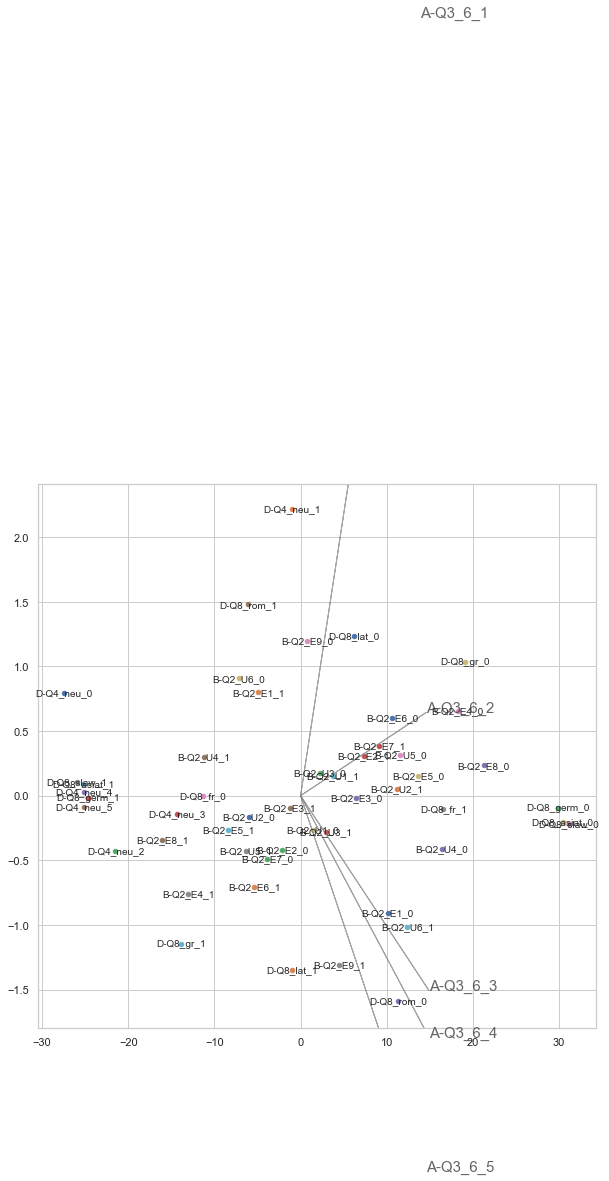

In [92]:
graf_biplot_test(testdf[testdf.columns[0:5]],5)